# scqubits examples: custom circuits

For further documentation of scqubits see https://scqubits.readthedocs.io/en/latest/.

---

In [1]:
import scqubits as scq
import matplotlib.pyplot as plt
import numpy as np

# Example:   asymmetric $0$-$\pi$ circuit

**$0$-$\pi$ circuit information**

In [2]:
zp_yaml ="""
# zero-pi circuit
branches:
- ["JJ", 1, 2, EJ=10, 20] 
- ["JJ", 3, 4, EJ, 20]
- ["L", 2, 3, 0.01]
- ["L", 4, 1, 0.008]
- ["C", 1, 3, 0.02]
- ["C", 2, 4, 0.02]
"""

**Define circuit**

In [3]:
zero_pi = scq.Circuit.from_yaml(zp_yaml, from_file=False, ext_basis="discretized")

## Lagrangian and variable transformation

**Lagrangian in terms of node variables**

In [4]:
zero_pi.sym_lagrangian(vars_type="node")

**Transformation between node variables $\{\varphi_n\}$ and new variables $\{\theta_m\}$**

In [5]:
zero_pi.variable_transformation()

In [6]:
zero_pi.transformation_matrix

array([[ 0., -1.,  1.,  1.],
       [ 1., -1.,  0.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 0.,  1.,  0.,  1.]])

**Types of $\{\theta_m\}$ variables in the $0$-$\pi$ circuit.** 

In [7]:
zero_pi.var_categories
# The numbers associated to each type correspond to the indices of the $\theta_m$ variables.

{'periodic': [1], 'extended': [2, 3], 'free': [], 'frozen': []}

**Symbolic Lagrangian in terms of new variables**

In [8]:
zero_pi.sym_lagrangian(vars_type="new")

## Hamiltonian and diagonalization

**Symbolic Hamiltonian**

In [9]:
zero_pi.sym_hamiltonian()

**Set cut-off for each variable**

In [10]:
zero_pi.cutoff_names

['cutoff_n_1', 'cutoff_ext_2', 'cutoff_ext_3']

In [11]:
zero_pi.cutoff_n_1 = 15
zero_pi.cutoff_ext_2 = 15
zero_pi.cutoff_ext_3 = 15

**Eigenvalues**

In [12]:
%time zero_pi.eigenvals()

CPU times: user 965 ms, sys: 3.64 s, total: 4.6 s
Wall time: 332 ms


array([-7.81287861, -7.55203947, -7.55159317, -6.76876942, -6.76876917,
       -6.74373122])

## Spectrum using hierarchical diagonalization algorithm (HD) to reduce computational time

**Associate the $\theta_m$ variables to subsystems**

In [13]:
system_hierarchy = [[1,3], [2]]
scq.truncation_template(system_hierarchy)

**Set cut-offs for the eigenbasis of each subsystem**

In [14]:
subsystem_trunc_dims = [80, 30]

**Setup circuit for HD**

In [15]:
zero_pi.cutoff_n_1 = 15
zero_pi.cutoff_ext_2 = 40
zero_pi.cutoff_ext_3 = 80
zero_pi.configure(system_hierarchy=system_hierarchy, subsystem_trunc_dims=subsystem_trunc_dims)

**Hamiltonian of each subsystem**

In [16]:
zero_pi.sym_hamiltonian(subsystem_index=0) 

In [17]:
zero_pi.sym_hamiltonian(subsystem_index=1)

**Interaction between subsystems**

In [18]:
zero_pi.sym_interaction((0,1))  # show coupling terms between subsystems 0 and 1

**Eigenvalues using HD**

In [19]:
%time zero_pi.eigenvals()

CPU times: user 28.1 s, sys: 1min 14s, total: 1min 42s
Wall time: 6.78 s


array([-3.64681404, -3.64595024, -3.61785781, -3.61699292, -3.56142004,
       -3.56054153])

## Set external fluxes

In [20]:
zero_pi.sym_external_fluxes()

{Φ1: (Branch(JJ, 3, 4),
  [Branch(JJ, 1, 2), Branch(L, 2, 3), Branch(L, 4, 1), Branch(JJ, 3, 4)])}

In [21]:
zero_pi.get_initdata()

Spectral data:   0%|          | 0/21 [00:00<?, ?it/s]

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='Φ1', ylabel='energy [GHz]'>)

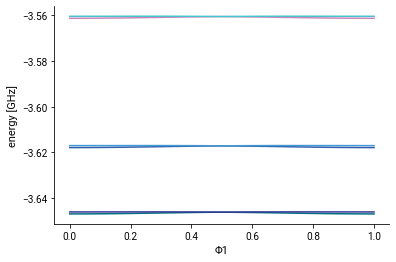

In [22]:
zero_pi.plot_evals_vs_paramvals("Φ1", np.linspace(0,1,21))
# zero_pi.plot_evals_vs_paramvals("ng1", np.linspace(0,1,51))

## Visualization capabilities

**Potential energy cross-sections**

In [23]:
zero_pi.potential_symbolic

(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:xlabel='$\\theta_{1}$', ylabel='$\\theta_{3}$'>)

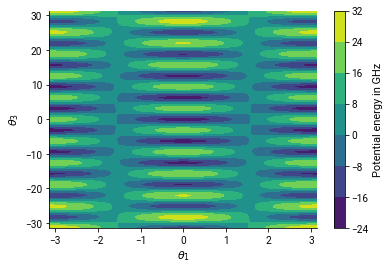

In [24]:
zero_pi.plot_potential(θ1=np.linspace(-np.pi, np.pi,100), 
                       θ3=np.linspace(-10*np.pi, 10*np.pi, 300), 
                       θ2 = 0.)

### Eigenstates

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='$\\theta_{3}$', ylabel='$|\\psi(\\theta_{3})|^2$'>)

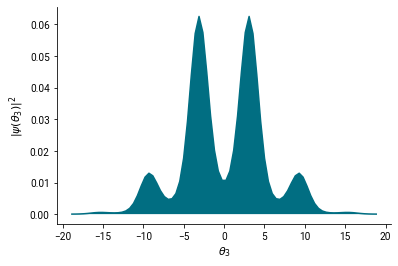

In [29]:
zero_pi.plot_wavefunction(which=0, var_indices=(3,))

A maximum of two variable indices can be specified for a plot:

(<Figure size 576x216 with 2 Axes>,
 <AxesSubplot:xlabel='$\\theta_{2}$', ylabel='$\\theta_{1}$'>)

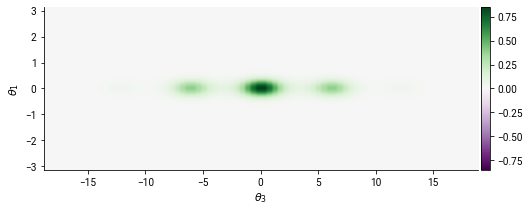

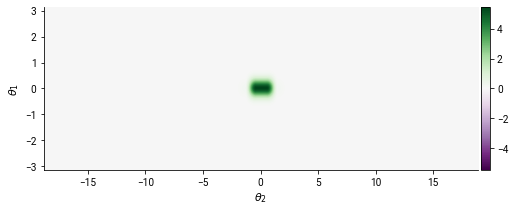

In [27]:
zero_pi.plot_wavefunction(which=1, var_indices=(1,3))
zero_pi.plot_wavefunction(which=1, var_indices=(1,2))